<a href="https://www.kaggle.com/code/martaseidler/apple-quality-prediction-91-accuracy?scriptVersionId=161968279" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Load libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('/kaggle/input/apple-quality/apple_quality.csv', encoding='utf-8')

## A quick look at the Data

In [3]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [5]:
df.tail()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


In [6]:
df.drop(4000, axis=0, inplace=True)

In [7]:
df['A_id'] = df['A_id'].astype('int32')

In [8]:
df.set_index('A_id', inplace=True)

In [9]:
df['Quality'].unique()

array(['good', 'bad'], dtype=object)

In [10]:
df['Acidity'] = df['Acidity'].astype('float64')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 265.6+ KB


In [12]:
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
A_id,,,,,,,,
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


array([[<Axes: title={'center': 'Size'}>,
        <Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Sweetness'}>],
       [<Axes: title={'center': 'Crunchiness'}>,
        <Axes: title={'center': 'Juiciness'}>,
        <Axes: title={'center': 'Ripeness'}>],
       [<Axes: title={'center': 'Acidity'}>, <Axes: >, <Axes: >]],
      dtype=object)

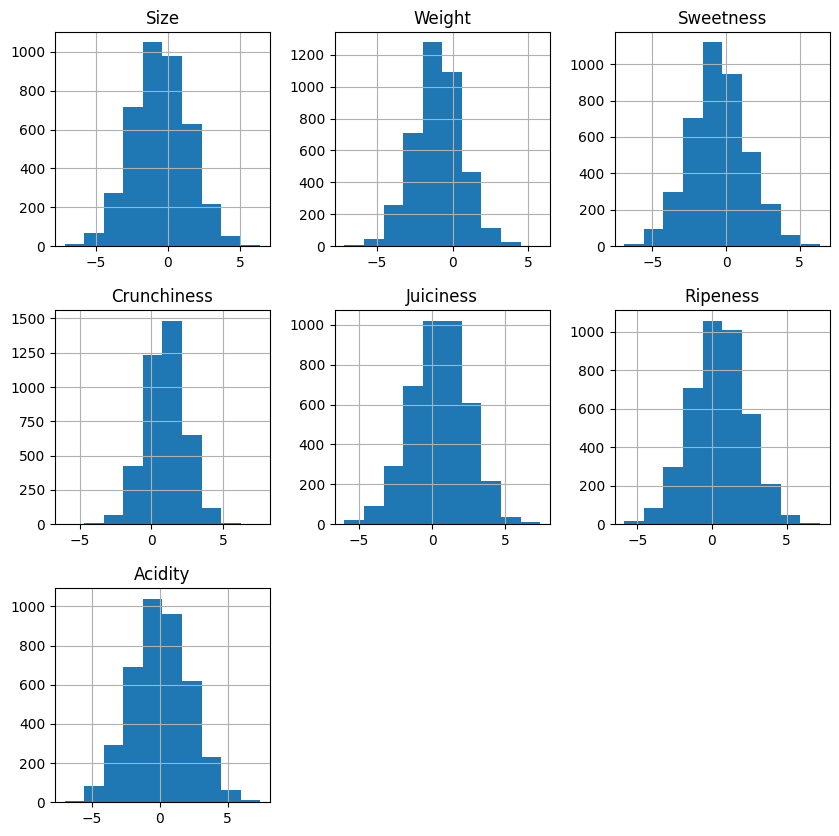

In [13]:
df.hist(figsize=(10,10))

In [14]:
df.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


In [15]:
df['Quality'].value_counts()

Quality
good    2004
bad     1996
Name: count, dtype: int64

## Data Visualization

In [16]:
sns.set_style('whitegrid')
sns.set_palette('deep')

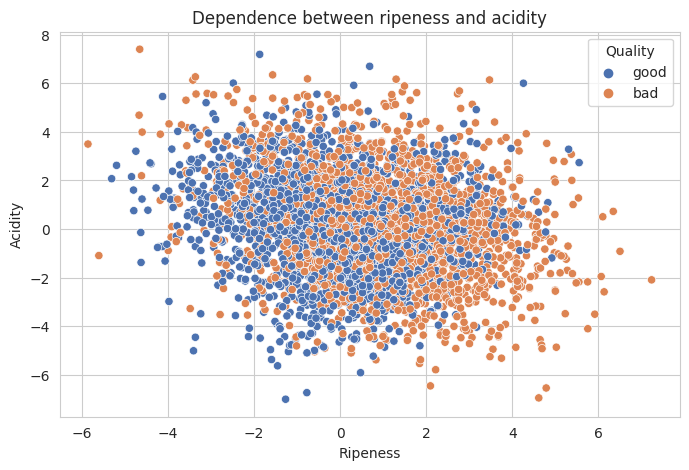

In [17]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Ripeness', y='Acidity', hue='Quality')
plt.title("Dependence between ripeness and acidity")
plt.show()

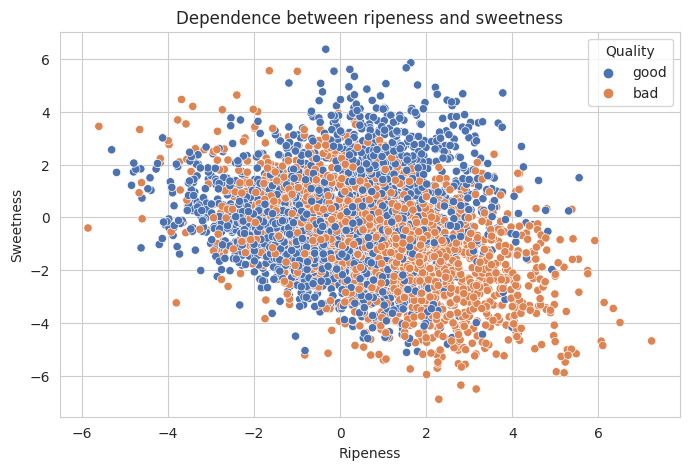

In [18]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Ripeness', y='Sweetness', hue='Quality')
plt.title("Dependence between ripeness and sweetness")
plt.show()

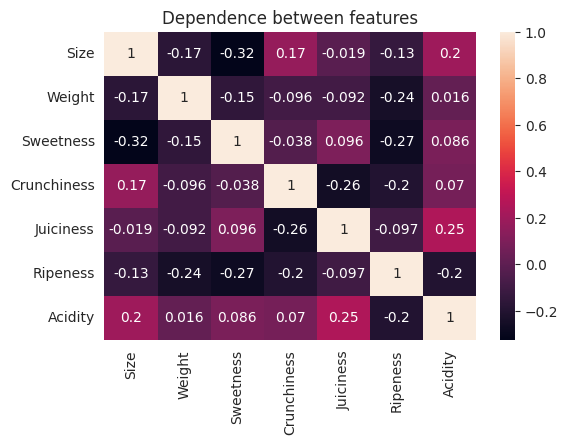

In [19]:
df_num = df.drop('Quality', axis=1)

plt.figure(figsize=(6, 4))
sns.heatmap(df_num.corr(), annot=True)
plt.title("Dependence between features")
plt.show() 

<Figure size 640x480 with 0 Axes>

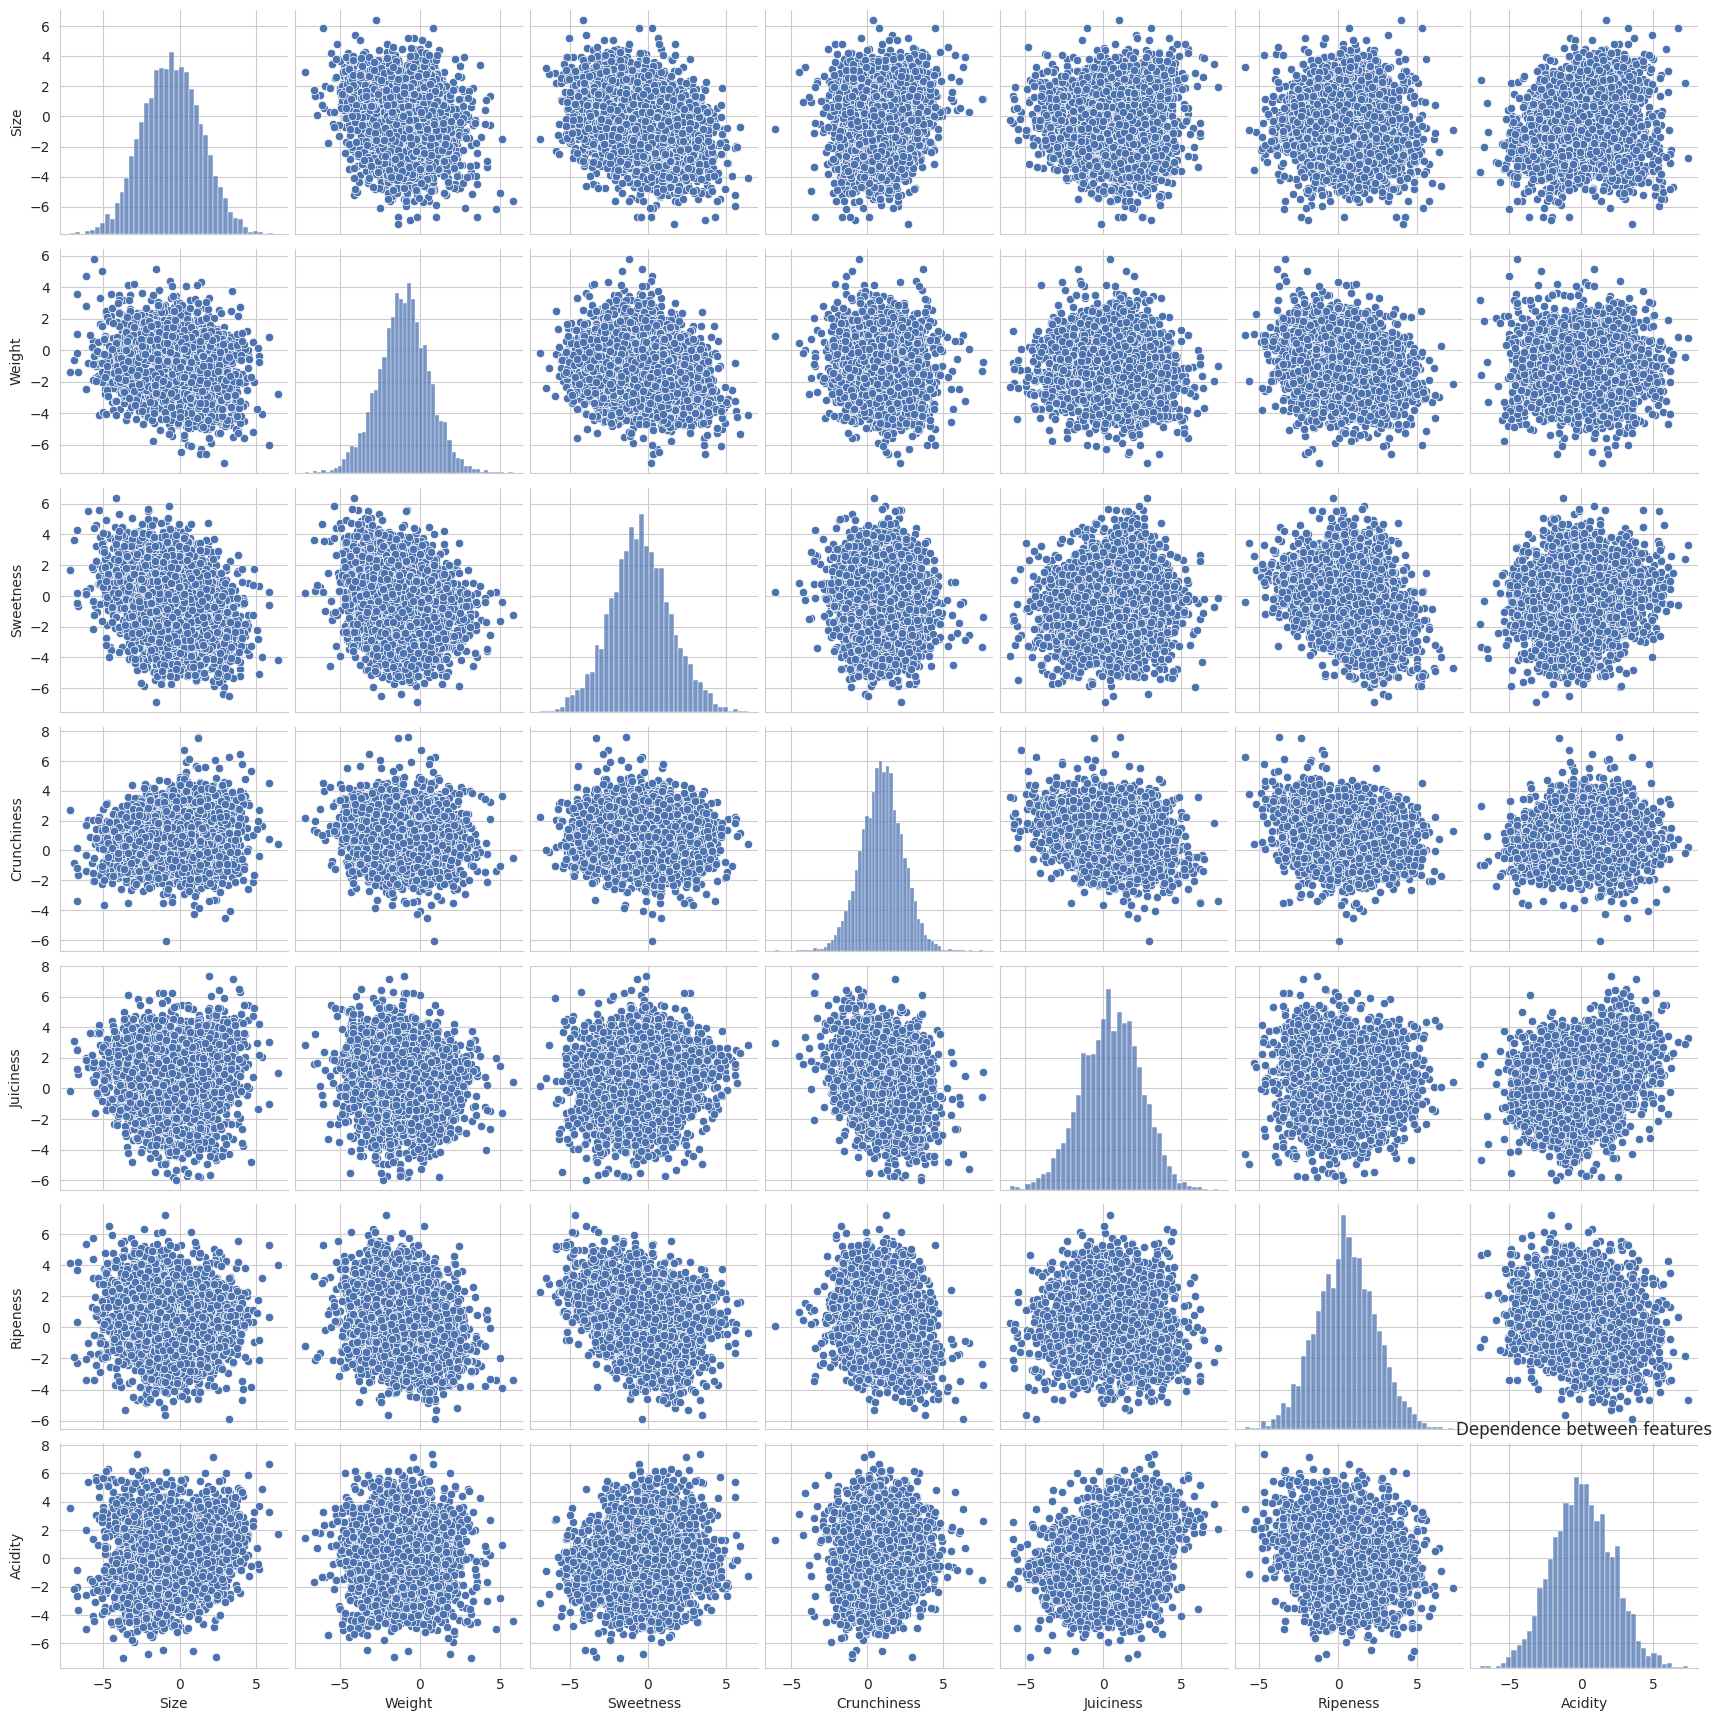

In [20]:
plt.figure()
sns.pairplot(df_num)
plt.title("Dependence between features")
plt.show()

## Preparing data for prediction

In [21]:
X = df.drop('Quality', axis=1)
y = df['Quality']

In [22]:
y = y.replace({'good': 1, 'bad': 0})

In [23]:
y.head()

A_id
0    1
1    1
2    0
3    1
4    1
Name: Quality, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Prediction

In [25]:
def acc_score(model):
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    return print('ACC score:', accuracy_score(y_test, y_preds))

In [26]:
forest_model_1 = RandomForestClassifier(n_estimators=100, random_state=42)
acc_score(forest_model_1)

ACC score: 0.89625


In [27]:
forest_model_2 = RandomForestClassifier(n_estimators=1000, random_state=42)
acc_score(forest_model_2)

ACC score: 0.91


In [28]:
xgb_model_1 = XGBClassifier(n_estimators=100, random_state=42)
acc_score(xgb_model_1)

ACC score: 0.90625


In [29]:
xgb_model_2 = XGBClassifier(n_estimators=1000, random_state=42)
acc_score(xgb_model_2)

ACC score: 0.90875


In [30]:
decision_model = DecisionTreeClassifier(random_state=42)
acc_score(decision_model)

ACC score: 0.81
